In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#loading data
dataset = load_dataset('coachprerakmehta/data_jobs')
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) and pd.notna(skill_list) else skill_list)

In [2]:
df[['job_title_short', 'job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


<Axes: xlabel='job_skills'>

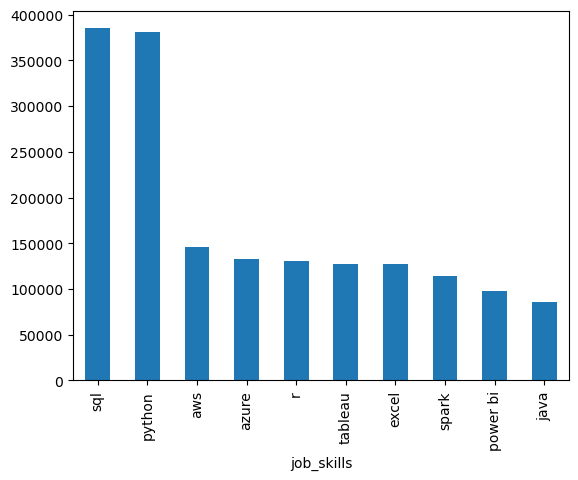

In [3]:
df_exploded = df.explode('job_skills')     #duplicate rows containing each skill in job_skills in each row
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [4]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()        #df_exploded.groupby(['job_title_short', 'job_skills']).size()
type(skills_count)
skills_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [5]:
df_skills_count = skills_count.reset_index(name='skill_count')      #to change the type from series to dataframe
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


<Axes: xlabel='job_skills'>

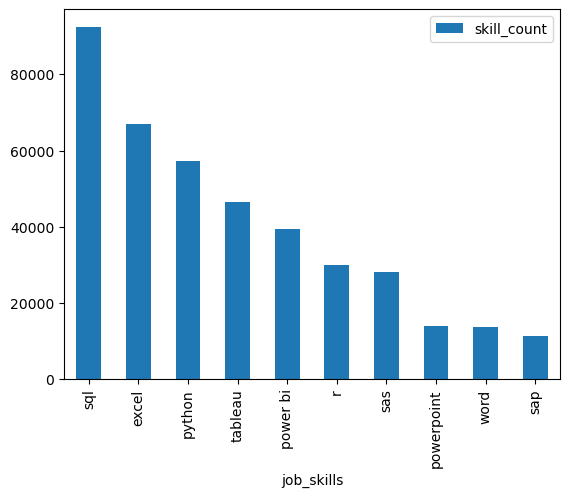

In [6]:
job_title = 'Data Analyst'
top_skills = 10
df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skills_final.plot(kind='bar', x='job_skills', y='skill_count')

<Axes: ylabel='job_skills'>

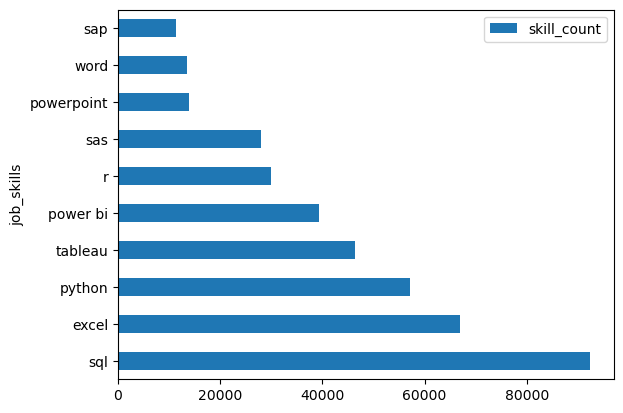

In [7]:
df_skills_final.plot(kind='barh', x='job_skills', y='skill_count')

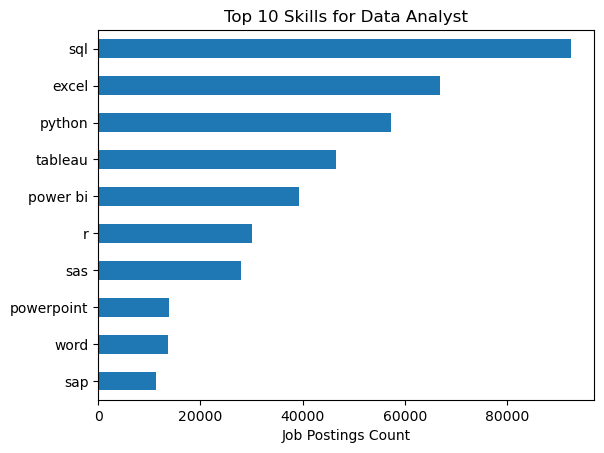

In [8]:
#inverting y-axis of the above plot
df_skills_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title(f"Top {top_skills} Skills for {job_title}")
plt.xlabel('Job Postings Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()